# About

This notebook shows the solution of the neutral atom diffusion model in high temperature plasmas.

## Atom transport in high temperature plasmas

Neutral atoms diffuses into even in high temperature plasmas, such as fusion plasmas through charge exchange collision.

The dominant processes we consider here is *charge exchange collision* with ions and atoms, where the high temperature ions are neutralized and high temperature neutrals are generated, and ionization collision, where  neutral atoms becomes ions.

The governing equations in the stationary cylindrical symmetry plasmas are 
+ particle balance equation
$$
0 = \frac{dn}{dt} = - \frac{1}{r} \frac{d}{dr} \left(r \mu \frac{d}{dr} (n k T) \right) - r_\mathrm{ion} n
$$
, where *n* is the atom density and *T* is the atom temperature.
$r_\mathrm{ion}$ is the ionization rate [/s] and $r_\mathrm{cx}$ is the charge exchange rate [/s].
The first term in the right hand side is the diffusion term, where the particle transport is driven by the pressure gradient.
The second term is the particle depletion term by the (electron impact) ionization.

+ energy balance equation
$$
0 = \frac{dn}{dt} = - \frac{1}{r} \frac{d}{dr} \left(r \mu \frac{d}{dr} \frac{2}{5}(n k^2 T^2) \right) 
                - (r_\mathrm{ion} + r_\mathrm{cx}) \frac{2}{3} n k T
                + r_\mathrm{cx} \frac{2}{3} n k T_\mathrm{ion}
$$
, where $T_\mathrm{ion}$ is the ion temperature.
The first term in the right hand side idicates the diffusion of the atom energy. 
The second term is the energy depletion term by the ionization and charge exchange process.
The third therm is the energy source term by the charge exchange collision.

## Synthetic plasma

In this notebook, we demonstrates how the plasma density and temperature affects the atom transport in the plasma.

We assume a hydrogen plasma, with high and low density.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import neutral_diffusion

In [2]:
# simplified atomic rate coefficients
coef_ion = 1.0e-14  # ionization rate coefficient [m3/s]
coef_cx = 1.0e-14  # ionization rate coefficient [m3/s]
m = 1.6726219e-27  # hydrogen mass [kg]

In [3]:
# radial coordinate
r = np.linspace(0, 1.0, 81)

In [4]:
# plasma 1 (lower density)
ne1 = 1.0e19 * (1 - r**10.0) + 1e17 # [m^-3]
ti1 = 1.0e3 * (1 - r**2.0) + 3.0 # [eV]

# plasma 2 (higher density)
ne2 = 5.0e19 * (1 - r**10.0) + 1e17  # [m^-3]
ti2 = 1.0e3 * (1 - r**2.0) + 3.0 # [eV]

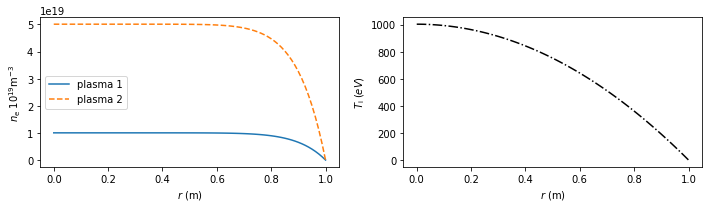

In [5]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(r, ne1, label='plasma 1')
plt.plot(r, ne2, '--', label='plasma 2')
plt.xlabel('$r$ (m)')
plt.ylabel('$n_\mathrm{e} \;\mathrm{10^{19} m^{-3}}$')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r, ti1, '-.k')
plt.xlabel('$r$ (m)')
plt.ylabel('$T_\mathrm{i} \;(eV)$')

plt.tight_layout()

## Solutions of the diffusion model

In [6]:
model1 = neutral_diffusion.model1d.Cylindrical(r, m)
n1, t1, _ = model1.solve(coef_ion * ne1, coef_cx * ne1, ti1, t_edge=3.0)

In [7]:
model2 = neutral_diffusion.model1d.Cylindrical(r, m)
n2, t2, _ = model2.solve(coef_ion * ne2, coef_cx * ne2, ti2, t_edge=3.0)

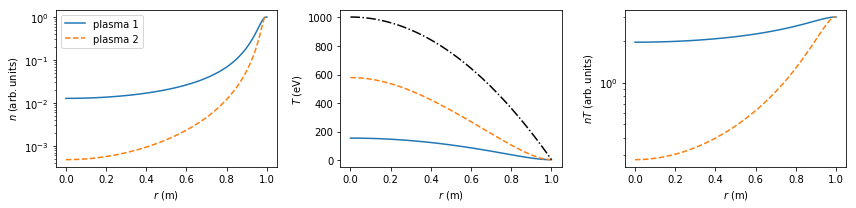

In [8]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot(r, n1, label='plasma 1')
plt.plot(r, n2, '--', label='plasma 2')
plt.yscale('log')
plt.xlabel('$r$ (m)')
plt.ylabel('$n \;\mathrm{(arb. units)}$')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(r, t1, label='plasma 1')
plt.plot(r, t2, '--', label='plasma 2')
plt.plot(r, ti1, '-.k')
plt.xlabel('$r$ (m)')
plt.ylabel('$T \;\mathrm{(eV)}$')

plt.subplot(1, 3, 3)
plt.plot(r, n1 * t1, label='plasma 1')
plt.plot(r, n2 * t2, '--', label='plasma 2')
plt.xlabel('$r$ (m)')
plt.ylabel('$n T \;\mathrm{(arb. units)}$')
plt.yscale('log')

plt.tight_layout()